<a href="https://colab.research.google.com/github/kangmg/PySCF4ASE/blob/main/test_notebooks/PySCF4ASE_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title <p><font size=5 color="#80aaff">Write requirements.txt</font></p>
#@markdown Write an appropriate requirements.txt for your CUDA version.
%%bash

# requirements.txt
echo 'ase' > requirements.txt
echo 'pyscf' >> requirements.txt
echo 'torch' >> requirements.txt

# check CUDA VERSION
NVCC_VERSION=$(nvcc --version | grep -oP 'release \K[0-9]+\.[0-9]+' | cut -d'.' -f1)

echo -e "\033[1;34mYour CUDA Version :\033[0m $NVCC_VERSION"

# add the appropriate gpu4pysf & cutensor packages for your CUDA version
# refer : https://github.com/pyscf/gpu4pyscf/blob/master/README.md
if [ "$NVCC_VERSION" -eq 11 ]; then
  echo "gpu4pyscf-cuda11x" >> requirements.txt
  echo "cutensor-cu11" >> requirements.txt
elif [ "$NVCC_VERSION" -eq 12 ]; then
  echo "gpu4pyscf-cuda12x" >> requirements.txt
  echo "cutensor-cu12" >> requirements.txt
else
  echo -e "\033[1;31mWARNING\033[0m gpu4pyscf not supported your CUDA Version"
fi

echo ''
echo -e '\033[1;32mrequirements.txt\033[0m'
echo -e '\033[1;32m----------------\033[0m'
cat requirements.txt
echo -e '\033[1;32m----------------\033[0m'

Your CUDA Version : 12

requirements.txt
----------------
ase
pyscf
torch
gpu4pyscf-cuda12x
cutensor-cu12
----------------


In [ ]:
#@title <p><font size=5 color="#80aaff">Setup</font></p>

# install packages
%pip install -q -r requirements.txt


# escape color codes
RED = '\033[31m'
GREEN = '\033[32m'
BLUE = '\033[34m'
RESET = '\033[0m'
'''
print(f"{RED}This is red text{RESET}")
print(f"{GREEN}This is green text{RESET}")
print(f"{BLUE}This is blue text{RESET}")
'''

# colab gpu error
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# dict to string function for comparing the parameters
def dict_to_str(parameters):
    return '\n'.join(f"'{k}' : {v}" for k, v in parameters.items())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.5/124.5 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.0/385.0 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.3/165.3 MB 5.2 MB/s eta 0:00:00


In [ ]:
#@title <p><font size=5 color="#80aaff">PySCF Calculator for ASE interface</font></p>


'''
===================================================
TODO
---------------------------------------------------

[ ] default 값 세팅하기
[#] gpu 확인해서 cpu gpu 버전 확인하기
[#] disp 추가하기
[ ] xc, disp 리스트 추가하기
[ ] system_changes 의미
[ ] init에서 **kwargs 말고 명시적으로 추가
[ ] verbose 등도 추가# unit convertor 추가하기
[ ] log 파일 저장 or 출력 지정하기기
[ ] parameter summary table 추가가
[ ] nlc랑 xc, basis 뭐가 가능한지, D3 D4 같은 것도 더 공부하기
[#] verbose 등도 추가
[#] max_memory, auxbasis, output
[ ] xc를 설정하면 disp랑 호환이 안되는 경우도 있음 이 경우 어떻게 처리할지?
[#] disp랑 nlc 부분 다시 손보기
[ ] 목적에 맞는 custom cacl나 ftn 만들기
[ ] dm21도 사용 가능하게 하기
[ ] RKS 말고 UKS도 설정 가능하게 해야 함
[ ] gpu cpu 모드가 제대로 설정이 안되는 듯. _set_device를 calculate에 넣어야 함
[ ] 오류 수정
# /usr/local/lib/python3.10/dist-packages/pyscf/gto/mole.py:1284: UserWarning: Function mol.dumps drops attribute ctxlock because it is not JSON-serializable warnings.warn(msg)
[ ] 버려지는 값들도 접근 가능하게 추가
# pyscf.dft.RKS가 반환하는 다른 값들
#     mo_energy :
#         Orbital energies
#     mo_occ
#         Orbital occupancy
#     mo_coeff
#         Orbital coefficients
===================================================



===================================================
DFT-D4 DFT supported functionals
---------------------------------------------------

Use D4 if the specified functional is avialable.
Currently, only a subset of functionals in DFT-D4
is supported. It includes :

B3LYP, B97, B1LYP, PBE0, PW6B95, M06L, M06, WB97,
WB97X, CAMB3LYP, PBE02, PBE0DH, MPW1K, MPWB1K,
B1B95, B1PW91, B2GPPLYP, B2PLYP, B3P86, B3PW91,
O3LYP, REVPBE, REVPBE0, REVTPSS, REVTPSSH, SCAN,
TPSS0, TPSSH, X3LYP, TPSS, BP86, BLYP, BPBE,
MPW1PW91, MPW1LYP, PBE, RPBE, and PW91.


Ref. https://manual.q-chem.com/6.0/subsec_DFT-D.html

===================================================



[Units]
=======  ===========  =============
Program  Quantities   Unit
-------  -----------  -------------
PySCF    Energy       Ha
PySCF    Force        Ha/Bohr
ASE      Energy       eV
ASE      Force        eV/Ang
=======  ===========  =============



===================================================
pyscf xc, disp, nlc 사용 관련 참고
---------------------------------------------------

xc에 disp correction(e.g. d3bj d4 등을 붙여주면 disp correciton이 자동으로 수행됨)
nlc랑 disp랑 둘 다 계산되는 걸 주의해야 함


https://github.com/pyscf/pyscf/blob/master/examples/dft/16-dft_d3.py

===================================================
'''

import numpy as np
from ase.calculators.calculator import Calculator, all_changes
from ase.units import Ha, Bohr
import torch
import pyscf

class PySCFCalculator(Calculator):
    '''
    Description
    ===========
    PySCF ASE Calculator for dft caculations
    '''

    '''
    ===============
    Units
    ---------------
    Energy  eV
    Force   eV/Ang
    ===============
    '''


    implemented_properties = ['energy', 'forces']

    default_parameters = {
        'charge': 0, # system charge
        'spin': 0, # (= nelec alpha-beta = 2S)
        'symmetry': False, # point group symmetry : e.g. Cs or C2v Ref. https://github.com/pyscf/pyscf/blob/master/examples/gto/13-symmetry.py
        'basis': 'def2-tzvp', # basis set
        'xc': 'wb97m-d3bj', # xc functional
        'density_fit': True, # resolution of identity approximation
        'auxbasis': 'auto', # basis for density_fit : e.g. 'cc-pvdz-jkfit' or 'auto'(pyscf sets automatically)
        'device': 'auto', # gpu, cpu
        'disp': None, # dispersion correction : d3bj d4 d3 etc.
        'nlc': 'auto', # non-local correlation. :  0, 'auto', nlc-functional
        # [Note]
        # Set nlc to 0 when D3 and D4 dispersion corrections are applied
        # https://github.com/pyscf/pyscf/blob/master/examples/dft/15-nlc_functionals.py
        # https://github.com/pyscf/pyscf/blob/master/examples/dft/16-dft_d3.py
        'max_cycle': 50, # max number of iterations
        'conv_tol': 1e-9, # converge threshold
        'verbose' : 4, # output log level
        'max_memory': 150000, # MB unit
        'chkfile': None, # chkpoint file contains MOs, orbital energies etc. : (str) e.g. './checkpoint/pyscf.chk'
        'output': None, # log file : (str) e.g. './output/pyscf_output.log'
        # TODO : conv_tol_grad, init_guess
    }

    def _set_device(self):
        # set device
        if self.parameters.device == 'auto':
            self.parameters.device = 'gpu' if torch.cuda.is_available() else 'cpu'
        # import modules : dft
        if self.parameters.device == 'cpu':
            from pyscf import dft
            self.dft = dft
        elif self.parameters.device == 'gpu':
            from gpu4pyscf import dft
            self.dft = dft
        else:
            raise ValueError(f"Invalid device: {self.parameters.device}, 'gpu' or 'cpu' supported.")

    def __init__(self, restart=None, label='PySCF', **kwargs):
        super().__init__(restart=restart, label=label, **kwargs)
        self.mol = None
        self.mf = None


    def calculate(self, atoms=None, properties=['energy'], system_changes=all_changes):
        super().calculate(atoms, properties, system_changes)

        self._set_device()

        if self.atoms is None:
            raise ValueError("atoms object is not set.")

        if system_changes:
            self.results.clear()
            self.mol = None
            self.mf = None

        if self.mol is None:
            self._generate_molecule()

        if self.mf is None:
            self._run_dft()

        if 'energy' in properties and 'energy' not in self.results:
            # pyscf energy unit : Hatree
            # ase energy unit : eV
            self.results['energy'] = self.mf.e_tot * Ha

        if 'forces' in properties and 'forces' not in self.results:
            # pyscf force unit : Ha/Bohr
            # ase force unit : eV/Ang
            self.results['forces'] = self._calculate_forces() * Ha / Bohr

    def _generate_molecule(self):
        positions = self.atoms.get_positions()
        symbols = self.atoms.get_chemical_symbols()
        atom_str = "; ".join([f"{s} {p[0]} {p[1]} {p[2]}" for s, p in zip(symbols, positions)])
        self.mol = pyscf.M(atom=atom_str,
                         basis=self.parameters.basis,
                         charge=self.parameters.charge,
                         spin=self.parameters.spin,
                         symmetry=self.parameters.symmetry,
                         verbose = self.parameters.verbose,
                         max_memory=self.parameters.max_memory,
                         output=self.parameters.output,
                         unit='Angstrom')


    def _run_dft(self):
        self.mf = self.dft.RKS(self.mol)
        self.mf.xc = self.parameters.xc
        self.mf.max_cycle = self.parameters.max_cycle
        self.mf.conv_tol = self.parameters.conv_tol
        self.mf.disp = self.parameters.disp

        # checkpoint file : default is /tmp
        if self.parameters.chkfile:
            self.mf.chkfile = self.parameters.chkfile

        # non-local correlation
        if self.parameters.nlc != 'auto':
            self.mf.nlc = self.parameters.nlc

        # density_fit ( or resolution of identity (RI) approximation)
        if self.parameters.density_fit:
            if self.parameters.auxbasis == 'auto':
                self.mf.density_fit()
            elif self.parameters.auxbasis != 'auto':
                self.mf.density_fit(auxbasis=self.parameters.auxbasis)

        self.mf.kernel()

    def _calculate_forces(self):
        return -self.mf.nuc_grad_method().kernel() # unit : Ha/Bohr

<p><font size=5 color="pink">Usage of Calculator</font></p>

> Define your system & ase.atoms.Atoms

In [ ]:
%%writefile sn2.xyz
6

C -1.277168 0.545365 -0.000063
Br 0.648058 0.543727 0.000199
H -1.652166 0.593222 1.017641
H -1.652215 -0.359651 -0.467952
H -1.651698 1.403205 -0.550042
Cl -4.402752 0.572053 0.000227

Writing sn2.xyz


In [ ]:
from ase.io import read

# define ase atoms object : ase.atoms.Atoms
mol = read("sn2.xyz", format='xyz')

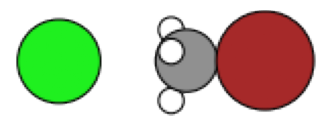

In [ ]:
#@title check molecule

from ase.io import write
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# save image
write("mol.png", mol, rotation="-130x,0y,0z")
img = mpimg.imread("mol.png")

# plot image
plt.figure(figsize=(4, 2))
plt.imshow(img)
plt.axis('off')
plt.show()

> Define PySCF DFT calculator

In [ ]:
# define calculator
calc = PySCFCalculator()

# check parameters
print(f'{BLUE}Default Parameters : {RESET}')
display(calc.parameters)

# just for comparison
import copy
DEFAULT_PARAMS = copy.deepcopy(calc.parameters)

/usr/local/lib/python3.10/dist-packages/gpu4pyscf/lib/cutensor.py:138: UserWarning: using cupy as the tensor contraction engine.
  warnings.warn(f'using {contract_engine} as the tensor contraction engine.')


Default Parameters : 


{'charge': 0,
 'spin': 0,
 'symmetry': False,
 'basis': 'def2-tzvp',
 'xc': 'wb97m-d3bj',
 'density_fit': True,
 'auxbasis': 'auto',
 'device': 'gpu',
 'disp': None,
 'nlc': 'auto',
 'max_cycle': 50,
 'conv_tol': 1e-09,
 'verbose': 4,
 'max_memory': 150000,
 'chkfile': None,
 'output': None}

> Change Parameters

In [ ]:
# change parameters
calc.parameters.charge = -1
calc.parameters.spin = 0
calc.parameters.basis = 'cc-pvtz'
calc.parameters.xc = 'wb97m-v'
calc.parameters.nlc = 0
calc.parameters.disp = 'd3bj'
calc.parameters.auxbasis = 'cc-pvdz-jkfit'

In [ ]:
#@title Parameters diff table
import difflib
from IPython.display import HTML

difflib.HtmlDiff._legend = ''

# diff. table
html_content = difflib.HtmlDiff().make_file(
    dict_to_str(DEFAULT_PARAMS).splitlines(),
    dict_to_str(calc.parameters).splitlines(),
    'default',
    'changed'
)

# Add custom CSS to make text bold
custom_css = """
<style>
    body {
        color: gray;
        font-weight: bold;
    }
    table {
        color: black;
        font-weight: bold;
    }
</style>
"""

# table customizing
styled_html = custom_css + html_content

print(' Difference between Default VS. Changed Parameters\n')
# Display the styled HTML
display(HTML(styled_html))

 Difference between Default VS. Changed Parameters



> Set Calculator

In [ ]:
# old style
# mol.set_calculator(calc)

# new style
mol.calc = calc

print(f"ASE Calculator QM program : {mol.calc.label}")

ASE Calculator QM program : PySCF


<p><font size=5 color="pink">Single Point Energy</font></p>

In [ ]:
mol.get_potential_energy()

System: uname_result(system='Linux', node='e14e32dbc39f', release='6.1.85+', version='#1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024', machine='x86_64')  Threads 1
Python 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
numpy 1.25.2  scipy 1.11.4  h5py 3.9.0
Date: Sat Jul 20 13:37:30 2024
PySCF version 2.6.2
PySCF path  /usr/local/lib/python3.10/dist-packages/pyscf/__init__.py
CUDA Environment
    CuPy 12.2.0
    CUDA Path /usr/local/cuda
    CUDA Build Version 12020
    CUDA Driver Version 12020
    CUDA Runtime Version 12010
CUDA toolkit
    cuSolver (11, 5, 2)
    cuBLAS 120103
    cuTENSOR None
Device info
    Device name b'Tesla T4'
    Device global memory 14.75 GB
GPU4PySCF 0.8.2
GPU4PySCF path  /usr/local/lib/python3.10/dist-packages/gpu4pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 6
[INPUT] num. electrons = 62
[INPUT] charge = -1
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = Angstrom
[INPUT

/usr/local/lib/python3.10/dist-packages/pyscf/gto/mole.py:1284: UserWarning: Function mol.dumps drops attribute _ctx_lock because it is not JSON-serializable
  warnings.warn(msg)


Calc dispersion correction with DFTD3.
Parameters: xc=wb97m, version=d3bj, atm=None
init E= -3073.1866088713
cycle= 1 E= -3074.42809791536  delta_E= -1.24  |ddm|= 1.51
cycle= 2 E= -3074.46687698012  delta_E= -0.0388  |ddm|= 0.87
cycle= 3 E= -3074.48963095797  delta_E= -0.0228  |ddm|= 0.272
cycle= 4 E= -3074.48979430678  delta_E= -0.000163  |ddm|= 0.0271
cycle= 5 E= -3074.4898410766  delta_E= -4.68e-05  |ddm|= 0.0157
cycle= 6 E= -3074.48984323343  delta_E= -2.16e-06  |ddm|= 0.00452
cycle= 7 E= -3074.48984335456  delta_E= -1.21e-07  |ddm|= 0.00123
cycle= 8 E= -3074.48984336617  delta_E= -1.16e-08  |ddm|= 0.000362
cycle= 9 E= -3074.48984336687  delta_E= -7.03e-10  |ddm|= 0.0001
converged SCF energy = -3074.48984336687


-83661.12995585232

> silence mode ( verbose = 0 )

<p><font color="#80aaff">cpu mode</font></p>

In [ ]:
import time

# start time
start_time = time.time()

# define calculator
calc = PySCFCalculator()
calc.parameters.verbose = 0
calc.parameters.charge = -1
calc.parameters.device = 'cpu'
# with default parameters

# set calculator
mol.calc = calc

# get single point energy
DFT_E = mol.get_potential_energy()

# end time
end_time = time.time()

# run time
runtime = end_time - start_time # sec

print(f'Energy in eV : {DFT_E}')

print(f"The calculation excuted within {runtime} sec in {mol.calc.parameters.device} mode.")

<p><font color="#80aaff">gpu mode</font></p>

In [ ]:
# start time
start_time = time.time()

# define calculator
calc = PySCFCalculator()
calc.parameters.verbose = 0
calc.parameters.charge = -1
# with default parameters

# set calculator
mol.calc = calc

# get single point energy
DFT_E = mol.get_potential_energy()

# end time
end_time = time.time()

# run time
runtime = end_time - start_time # sec

print(f'Energy in eV : {DFT_E}')

print(f"The calculation excuted within {runtime} sec in {mol.calc.parameters.device} mode.")

/usr/local/lib/python3.10/dist-packages/pyscf/gto/mole.py:1284: UserWarning: Function mol.dumps drops attribute _ctx_lock because it is not JSON-serializable
  warnings.warn(msg)


Energy in eV : -83659.62242861325
The calculation excuted within 402.69955587387085 sec in gpu mode.


<p><font size=5 color="pink">Geometry Optimization</font></p>

In [ ]:
from ase.optimize import BFGS

opt = BFGS(mol)
opt.run()

      Step     Time          Energy          fmax
BFGS:    0 14:00:47   -83659.622429        1.188548
BFGS:    1 14:14:18   -83659.642457        0.494201
BFGS:    2 14:27:16   -83659.649394        0.166387
BFGS:    3 14:40:15   -83659.651223        0.100858
BFGS:    4 14:53:15   -83659.651705        0.060464


> check optimize coordinate

In [ ]:
from io import StringIO

# xyz format string
with StringIO() as output:
    write(output, mol, format="xyz")
    opt_xyz = output.getvalue()
    print(f'{GREEN}Optimized coordinate in xyz format :{RESET} \n\n{opt_xyz}')

# get_coordinate()
print(f"{GREEN}Optimized Coordinate in ndarray :{RESET} \n\n{mol.get_positions()}")

In [ ]:
mol.calc.parameters.device

<p><font size=5 color="pink">Vibrational Analysis</font></p>

<p><font size=5 color="pink">Thermo Chemistry</font></p>

In [ ]:
# from ase.vibrations import Vibrations
# from ase.thermochemistry import IdealGasThermo


# PE = mol.get_potential_energy()

# vib = Vibrations(mol)
# vib.run()
# vib_e = vib.get_energies()

# thermo = IdealGasThermo(vib_energies=vib_e,
#                         potentialenergy=PE,
#                         atoms=mol,
#                         geometry='nonlinear',
#                         symmetrynumber=2, spin=0)
# G = thermo.get_gibbs_energy(temperature=298.15, pressure=101325.)

In [ ]:
# from ase.thermochemistry import IdealGasThermo
# help(IdealGasThermo)

In [ ]:
#@title <p><font size=5 color="pink">Custom functions</font></p>
from ase.io import read, write
from ase.optimize import BFGS
from io import StringIO

def dft_optimize(xyz_string:str, charge:int, mult:int, xc:str):
    '''ase interface pyscf dft optimizer
    '''
    spin = mult - 1

    # ase atoms object
    mol = read(xyz_string, format='xyz')

    # pyscf calculator setting
    calc = PySCFCalculator()
    calc.parameters.charge = charge
    calc.parameters.spin = spin
    calc.parameters.xc = xc

    mol.calc = calc

    # optimize
    opt = BFGS(mol)
    opt.run()

    # print optimized coordinate
    with StringIO() as output:
      write(output, mol, format="xyz")
      opt_xyz = output.getvalue()
      print(f'Optimized coordinate : \n{opt_xyz}')

    return mol


def dft_energy(xyz_string:str, charge:int, mult:int, xc:str):
    '''ase interface pyscf dft energy calculator
    '''
    spin = mult - 1

    # ase atoms object
    mol = read(xyz_string, format='xyz')

    # pyscf calculator setting
    calc = PySCFCalculator()
    calc.parameters.charge = charge
    calc.parameters.spin = spin
    calc.parameters.xc = xc

    mol.calc = calc

    # print energy
    print(f'Energy : {mol.get_potential_energy():.4f} eV\n')

    return mol


In [ ]:
#@title <p><font size=5 color="#9FE2BF">Grid Test</font></p>

xc_list = ['wB97m-d3bj', 'b97']
basis = ['def2-tzvp', 'cc-pvtz']
charge_spin = [(0, 0), (-1, 1), (1, 1)]
device = ['cpu', 'gpu']
nlc_list = [0, 'auto']
disp = ['d3bj', 'd4']
density_fit = [True, False]
auxbasis = ['auto', 'cc-pvdz-jkfit']

In [ ]:
#@title <p><font size=5 color="#9FE2BF">Benckmarks</font></p>
#@markdown <p><font size=3 color="#9FE2BF">CPU vs. GPU</font></p>
code = ''

In [ ]:
#@title <p><font size=5 color="#9FE2BF">tmp</font></p>
